In [3]:
!pip install wordcloud


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
# Đọc dữ liệu từ file JSON
with open('Dataset/train.json', 'r', encoding='utf-8') as f:
    train_data = json.load(f)

with open('Dataset/test.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

In [6]:
# Chuyển đổi dữ liệu thành DataFrame để dễ xử lý
def json_to_dataframe(data):
    rows = []
    for item in data:
        context = item['context']
        for qa in item['qas']:
            question = qa['question']
            is_impossible = qa['is_impossible']
            for answer in qa.get('answers', []):
                rows.append({
                    'context': context,
                    'question': question,
                    'answer': answer['text'],
                    'answer_start': answer['answer_start'],
                    'is_impossible': is_impossible
                })
    return pd.DataFrame(rows)

train_df = json_to_dataframe(train_data)
test_df = json_to_dataframe(test_data)

In [7]:
# Thống kê độ dài của câu hỏi và đoạn văn
train_df['context_length'] = train_df['context'].apply(len)
test_df['context_length'] = test_df['context'].apply(len)

train_df['question_length'] = train_df['question'].apply(len)
test_df['question_length'] = test_df['question'].apply(len)

train_df['answer_length'] = train_df['answer'].apply(len)
test_df['answer_length'] = test_df['answer'].apply(len)

In [8]:
# Display some basic statistics
print("Train Data Description:")
print(train_df.describe())


Train Data Description:
       answer_start  context_length  question_length  answer_length
count  50046.000000    50046.000000     50046.000000   50046.000000
mean     325.467470      792.469868        61.946469      20.320305
std      289.410978      360.048254        23.613835      28.352451
min       -1.000000      131.000000         1.000000       0.000000
25%      103.000000      561.000000        45.000000       7.000000
50%      253.000000      724.000000        59.000000      13.000000
75%      473.000000      969.000000        75.000000      23.000000
max     3180.000000     3280.000000       277.000000    1135.000000


In [9]:
# Display some basic statistics
print("\nTest Data Description:")
print(test_df.describe())



Test Data Description:
       answer_start  context_length  question_length  answer_length
count  15994.000000    15994.000000     15994.000000   15994.000000
mean     292.538577      727.811617        61.776666      17.793235
std      280.477693      387.056042        22.841887      25.897956
min       -1.000000      131.000000         1.000000       0.000000
25%       87.000000      443.000000        45.000000       7.000000
50%      214.000000      658.000000        59.000000      12.000000
75%      415.000000      924.000000        75.000000      20.000000
max     3180.000000     3280.000000       209.000000    1135.000000


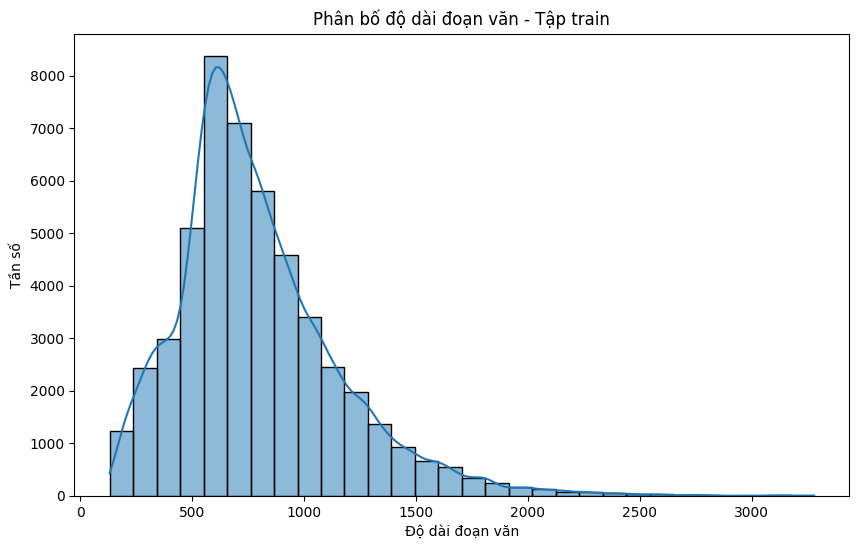

In [10]:
# Phân bố độ dài đoạn văn
plt.figure(figsize=(10, 6))
sns.histplot(train_df['context_length'], kde=True, bins=30)
plt.title('Phân bố độ dài đoạn văn - Tập train')
plt.xlabel('Độ dài đoạn văn')
plt.ylabel('Tần số')
plt.show()



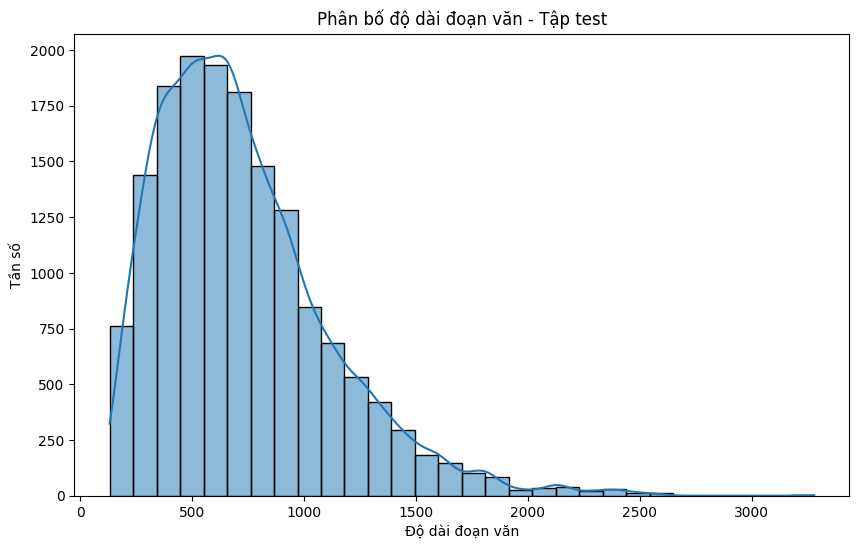

In [11]:
# Phân bố độ dài đoạn văn
plt.figure(figsize=(10, 6))
sns.histplot(test_df['context_length'], kde=True, bins=30)
plt.title('Phân bố độ dài đoạn văn - Tập test')
plt.xlabel('Độ dài đoạn văn')
plt.ylabel('Tần số')
plt.show()

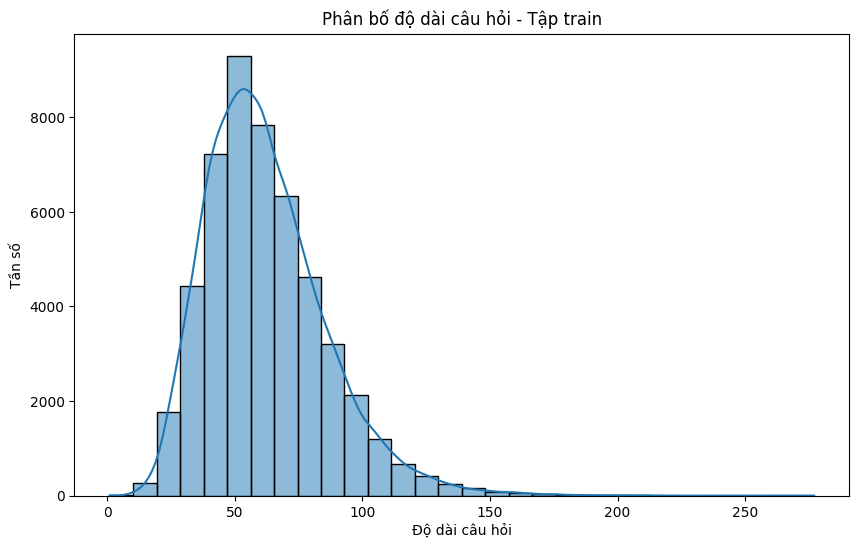

In [12]:
# Phân bố độ dài câu hỏi
plt.figure(figsize=(10, 6))
sns.histplot(train_df['question_length'], kde=True, bins=30)
plt.title('Phân bố độ dài câu hỏi - Tập train')
plt.xlabel('Độ dài câu hỏi')
plt.ylabel('Tần số')
plt.show()

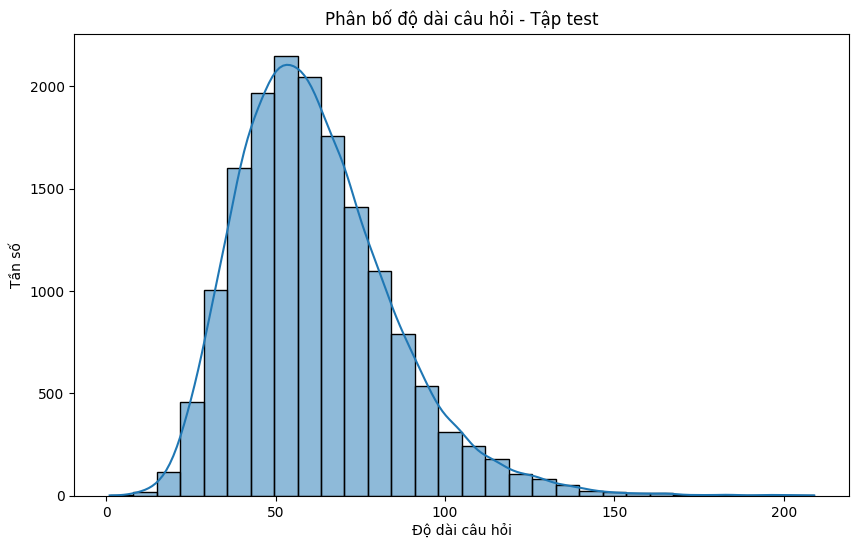

In [13]:
# Phân bố độ dài câu hỏi
plt.figure(figsize=(10, 6))
sns.histplot(test_df['question_length'], kde=True, bins=30)
plt.title('Phân bố độ dài câu hỏi - Tập test')
plt.xlabel('Độ dài câu hỏi')
plt.ylabel('Tần số')
plt.show()

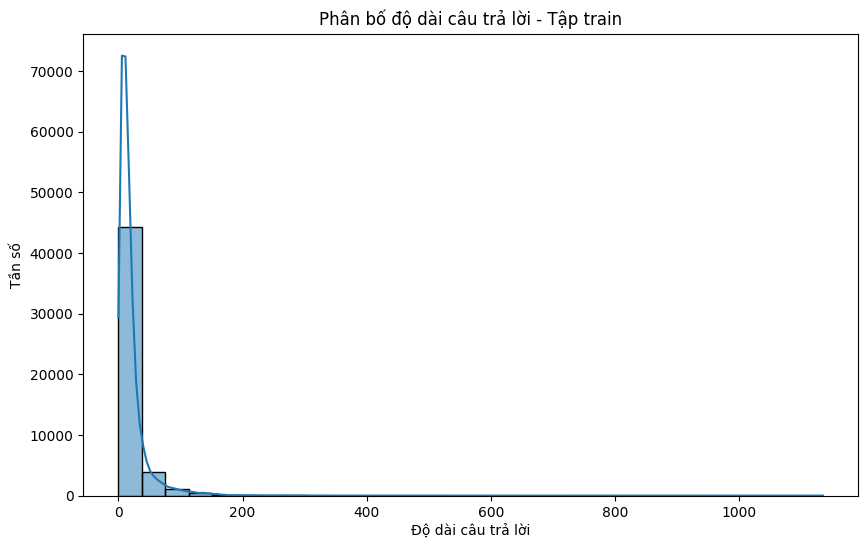

In [14]:
# Phân bố độ dài câu trả lời
plt.figure(figsize=(10, 6))
sns.histplot(train_df['answer_length'], kde=True, bins=30)
plt.title('Phân bố độ dài câu trả lời - Tập train')
plt.xlabel('Độ dài câu trả lời')
plt.ylabel('Tần số')
plt.show()

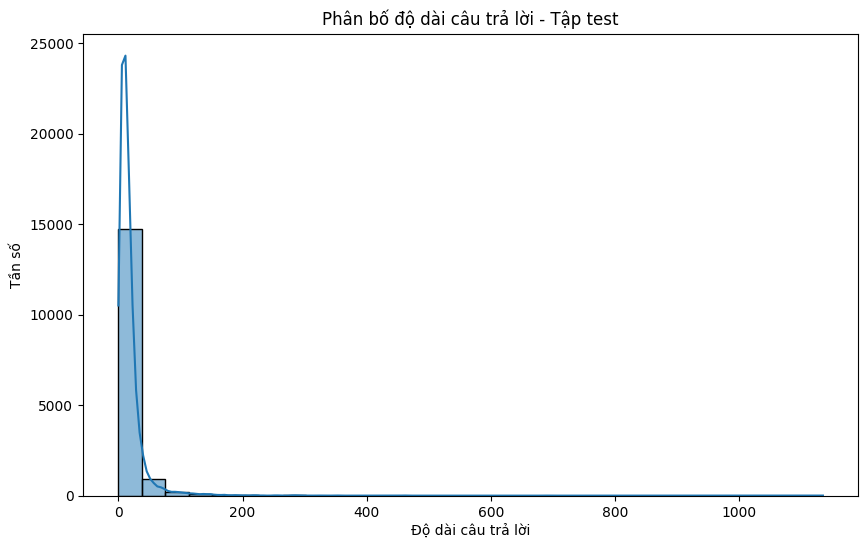

In [15]:
# Phân bố độ dài câu trả lời
plt.figure(figsize=(10, 6))
sns.histplot(test_df['answer_length'], kde=True, bins=30)
plt.title('Phân bố độ dài câu trả lời - Tập test')
plt.xlabel('Độ dài câu trả lời')
plt.ylabel('Tần số')
plt.show()

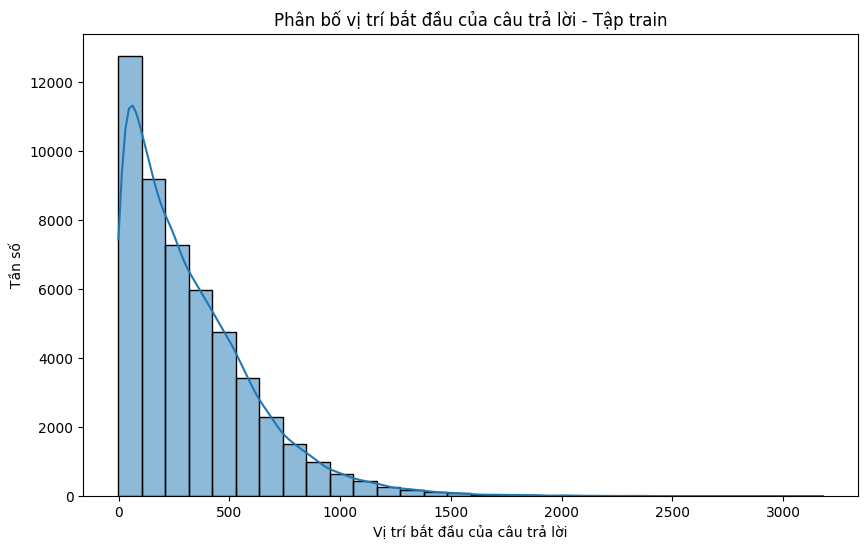

In [16]:
# Phân bố vị trí bắt đầu của câu trả lời
plt.figure(figsize=(10, 6))
sns.histplot(train_df['answer_start'], kde=True, bins=30)
plt.title('Phân bố vị trí bắt đầu của câu trả lời - Tập train')
plt.xlabel('Vị trí bắt đầu của câu trả lời')
plt.ylabel('Tần số')
plt.show()

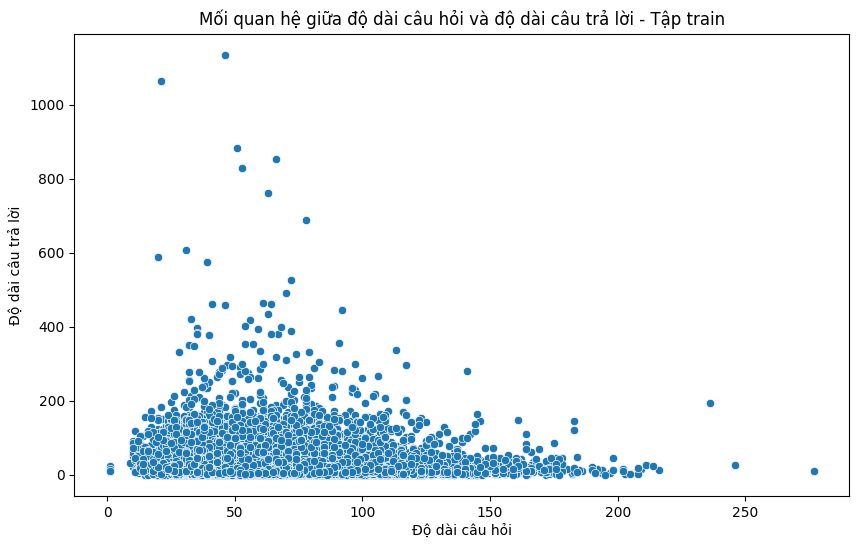

In [17]:
# Phân tích mối quan hệ giữa độ dài câu hỏi và độ dài câu trả lời
plt.figure(figsize=(10, 6))
sns.scatterplot(x='question_length', y='answer_length', data=train_df)
plt.title('Mối quan hệ giữa độ dài câu hỏi và độ dài câu trả lời - Tập train')
plt.xlabel('Độ dài câu hỏi')
plt.ylabel('Độ dài câu trả lời')
plt.show()

Hệ số tương quan giữa độ dài câu hỏi và độ dài câu trả lời: -0.034120171080630875


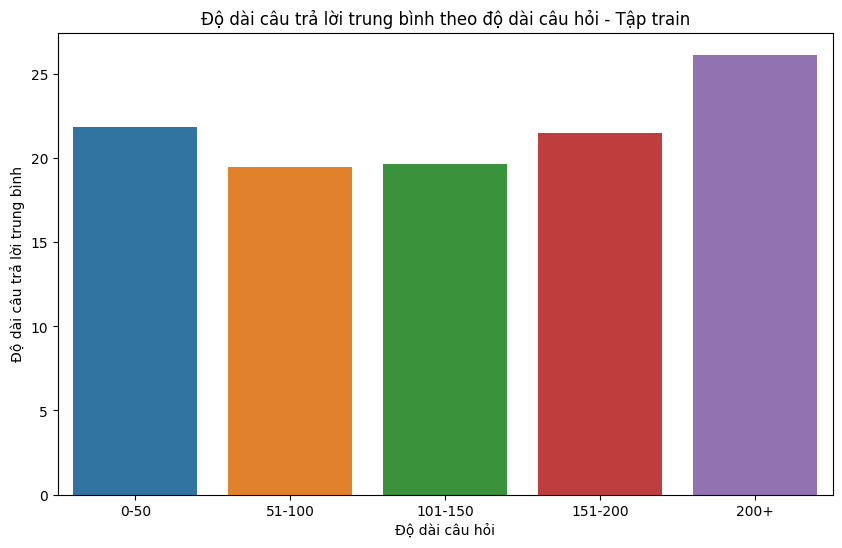

In [18]:
import numpy as np

# Tính toán hệ số tương quan
correlation = np.corrcoef(train_df['question_length'], train_df['answer_length'])[0, 1]
print(f'Hệ số tương quan giữa độ dài câu hỏi và độ dài câu trả lời: {correlation}')

# Phân tích độ dài câu trả lời trung bình theo độ dài câu hỏi
bins = [0, 50, 100, 150, 200, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '200+']
train_df['question_length_bin'] = pd.cut(train_df['question_length'], bins=bins, labels=labels)

answer_length_by_question_length = train_df.groupby('question_length_bin')['answer_length'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='question_length_bin', y='answer_length', data=answer_length_by_question_length)
plt.title('Độ dài câu trả lời trung bình theo độ dài câu hỏi - Tập train')
plt.xlabel('Độ dài câu hỏi')
plt.ylabel('Độ dài câu trả lời trung bình')
plt.show()


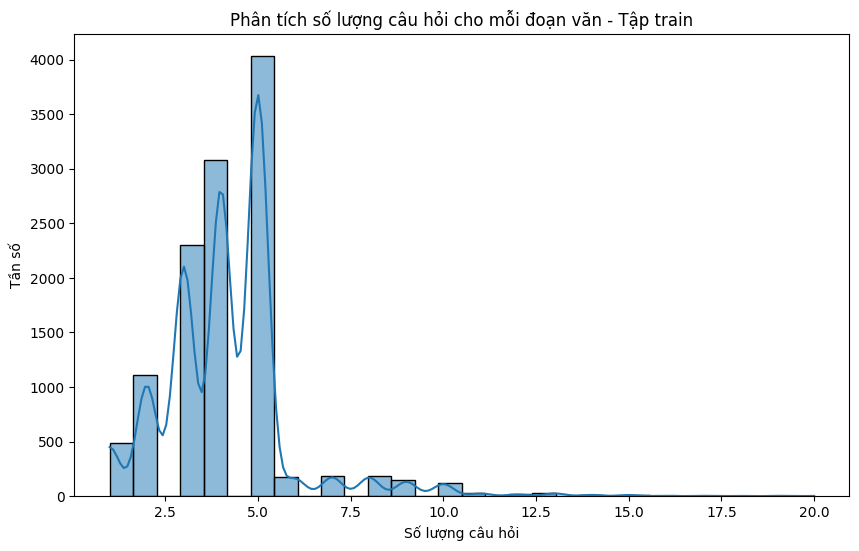

In [19]:
# Phân tích số lượng câu hỏi cho mỗi đoạn văn
context_question_count = train_df.groupby('context').size().reset_index(name='question_count')
plt.figure(figsize=(10, 6))
sns.histplot(context_question_count['question_count'], kde=True, bins=30)
plt.title('Phân tích số lượng câu hỏi cho mỗi đoạn văn - Tập train')
plt.xlabel('Số lượng câu hỏi')
plt.ylabel('Tần số')
plt.show()


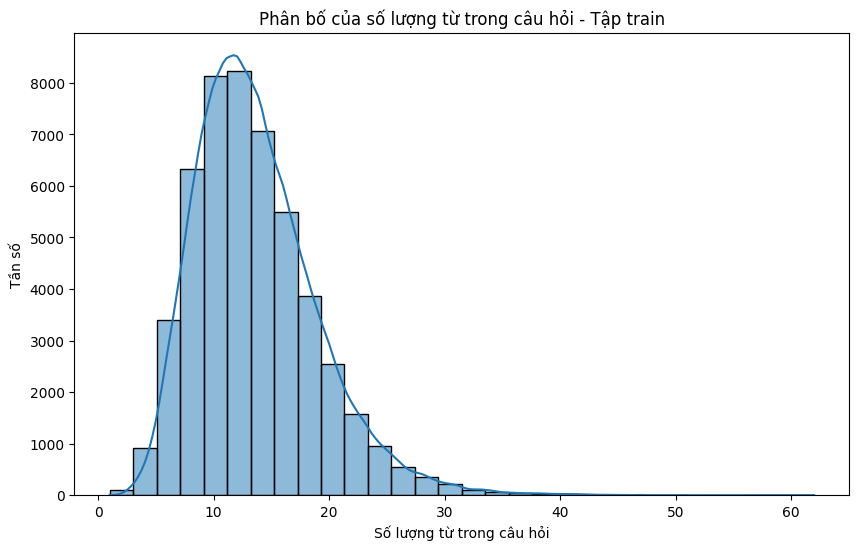

In [20]:
# Phân bố của số lượng từ trong câu hỏi
train_df['question_word_count'] = train_df['question'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(train_df['question_word_count'], kde=True, bins=30)
plt.title('Phân bố của số lượng từ trong câu hỏi - Tập train')
plt.xlabel('Số lượng từ trong câu hỏi')
plt.ylabel('Tần số')
plt.show()

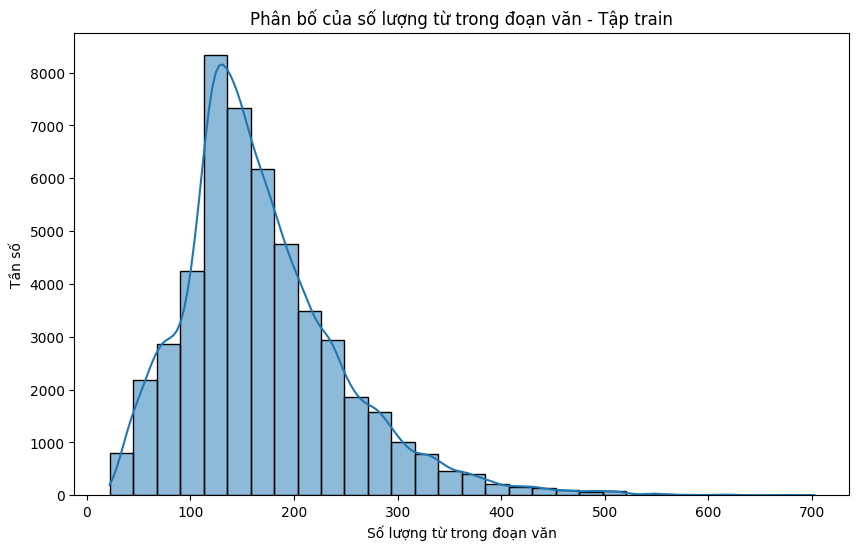

In [21]:
# Phân bố của số lượng từ trong đoạn văn
train_df['context_word_count'] = train_df['context'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(train_df['context_word_count'], kde=True, bins=30)
plt.title('Phân bố của số lượng từ trong đoạn văn - Tập train')
plt.xlabel('Số lượng từ trong đoạn văn')
plt.ylabel('Tần số')
plt.show()

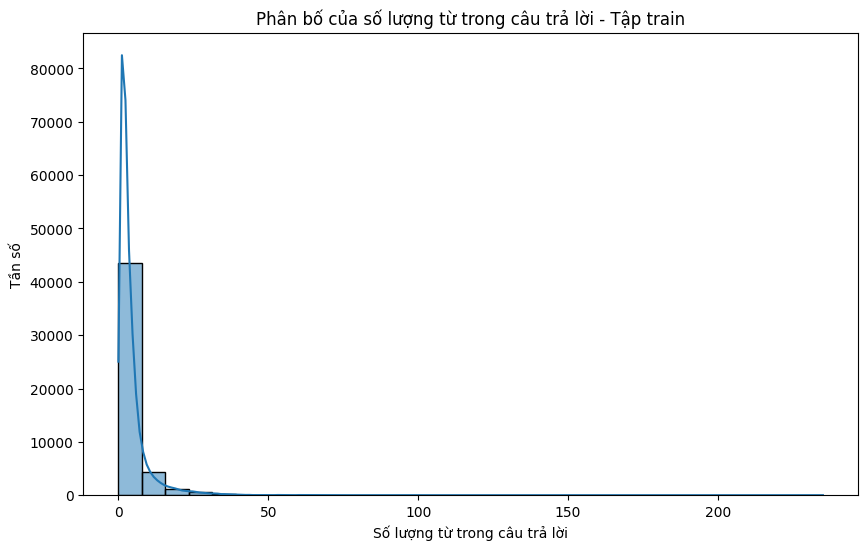

In [22]:
# Phân bố của số lượng từ trong câu trả lời
train_df['answer_word_count'] = train_df['answer'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(train_df['answer_word_count'], kde=True, bins=30)
plt.title('Phân bố của số lượng từ trong câu trả lời - Tập train')
plt.xlabel('Số lượng từ trong câu trả lời')
plt.ylabel('Tần số')
plt.show()

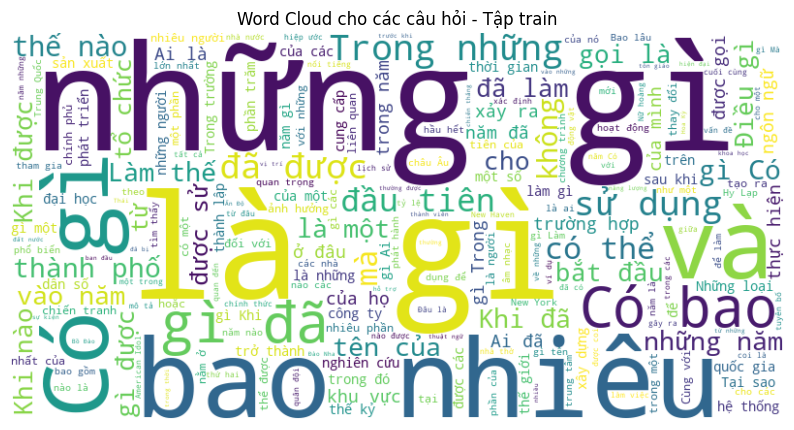

In [23]:
# Word cloud cho các câu hỏi
question_text = " ".join(train_df['question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud cho các câu hỏi - Tập train')
plt.axis('off')
plt.show()

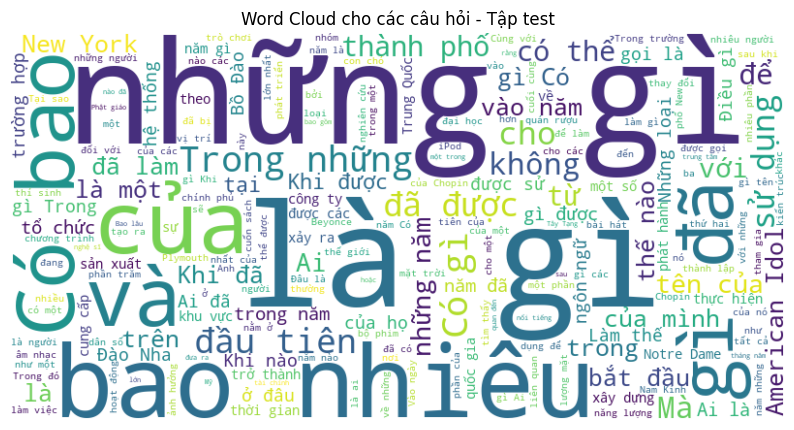

In [24]:
# Word cloud cho các câu hỏi
question_text = " ".join(test_df['question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud cho các câu hỏi - Tập test')
plt.axis('off')
plt.show()

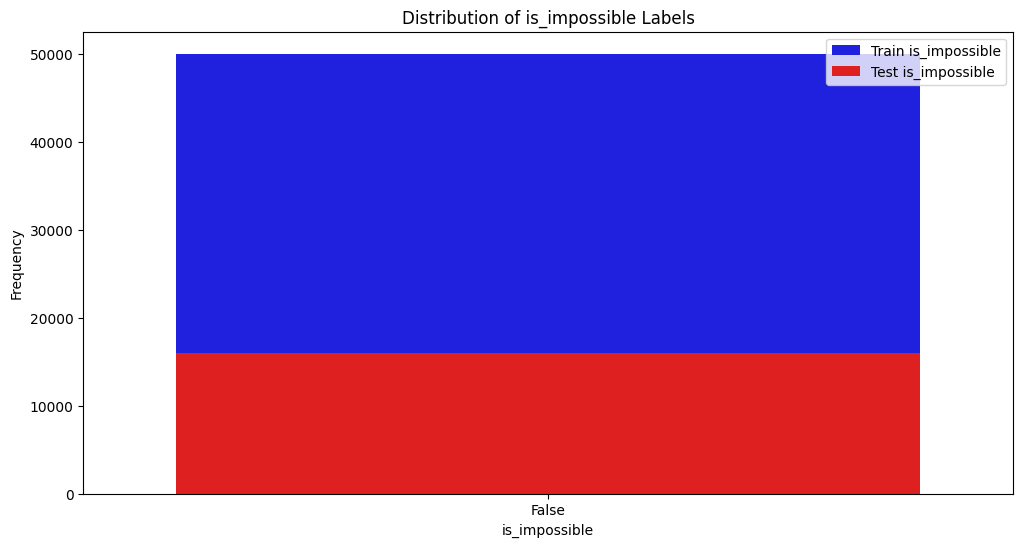

In [26]:
from collections import Counter

train_impossible_counts = Counter(train_df['is_impossible'])
test_impossible_counts = Counter(test_df['is_impossible'])

plt.figure(figsize=(12, 6))
sns.barplot(x=list(train_impossible_counts.keys()), y=list(train_impossible_counts.values()), color='blue', label='Train is_impossible')
sns.barplot(x=list(test_impossible_counts.keys()), y=list(test_impossible_counts.values()), color='red', label='Test is_impossible')
plt.legend()
plt.title('Distribution of is_impossible Labels')
plt.xlabel('is_impossible')
plt.ylabel('Frequency')
plt.show()



In [27]:
# Hiển thị một vài thống kê cơ bản
print('Số lượng câu hỏi trong tập train:', len(train_df))
print('Số lượng câu hỏi trong tập test:', len(test_df))
print('Số lượng câu hỏi "is_impossible" trong tập train:', train_df['is_impossible'].sum())
print('Độ dài trung bình của đoạn văn:', train_df['context_length'].mean())
print('Độ dài trung bình của câu hỏi:', train_df['question_length'].mean())
print('Độ dài trung bình của câu trả lời:', train_df['answer_length'].mean())
print('Số lượng từ trung bình trong câu hỏi:', train_df['question_word_count'].mean())
print('Số lượng từ trung bình trong đoạn văn:', train_df['context_word_count'].mean())
print('Số lượng từ trung bình trong câu trả lời:', train_df['answer_word_count'].mean())

Số lượng câu hỏi trong tập train: 50046
Số lượng câu hỏi trong tập test: 15994
Số lượng câu hỏi "is_impossible" trong tập train: 0
Độ dài trung bình của đoạn văn: 792.469867721696
Độ dài trung bình của câu hỏi: 61.94646924829157
Độ dài trung bình của câu trả lời: 20.32030531910642
Số lượng từ trung bình trong câu hỏi: 13.718738760340488
Số lượng từ trung bình trong đoạn văn: 169.6543579906486
Số lượng từ trung bình trong câu trả lời: 4.3172880949526435
